HPA_KF
POTデータの範囲 15.12 ~ 35.22 POTデータ数: 141
最大尤度: 2.4606084320926795e-29
最尤推定 ξ: -0.4046822742474917 σ: 8.638119095610277 RV: 34.82096521397619
HFA_KF_c0
POTデータの範囲 15.05 ~ 35.11 POTデータ数: 120
最大尤度: 5.3525664391308254e-33
最尤推定 ξ: -0.5418060200668897 σ: 11.567522106414737 RV: 35.64685910624961


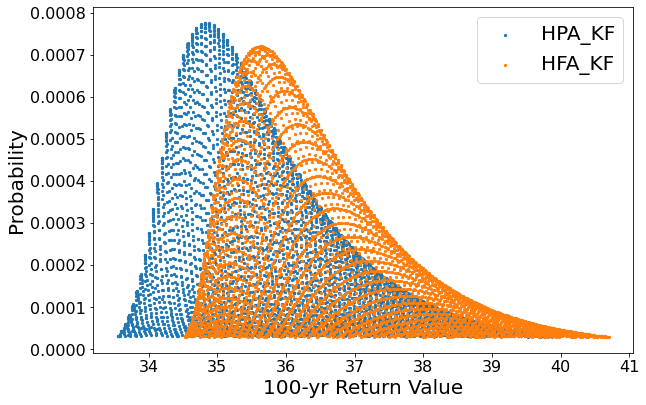

In [1]:
"""
それぞれのモデルのイベントごとのSTMの100yRVを算出する.
"""

from csv import reader
import matplotlib.pyplot as plt
import numpy as np
import func
import math

RV = []
PARAM = []
RV_PRO = []

for num in range(2):  # P or F
    model = 'KF'
    if num == 0:
        model = 'HPA_' + model
    else:
        model = 'HFA_' + model + '_c0'

    print(model)

    with open('../Ex_csv/' + model + '_STM.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        STM = list(csv_reader)
    
    POT_DATA = sorted([float(s[0]) for s in STM], reverse=True)

    print('POTデータの範囲', POT_DATA[-1], '~', POT_DATA[0], 'POTデータ数:', len(POT_DATA))
    
    rv, param, rv_pro = func.lwm_gpd(data=POT_DATA, error=[0.005], thr=POT_DATA[-1], n=219143, n0=len(POT_DATA), con=0.95)
    RV.append(rv)
    PARAM.append(param)
    RV_PRO.append(rv_pro)



fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(1, 1, 1)
# ax2 = fig1.add_subplot(1, 1, 1)

# パラメータ等高線の描画
for i in range(2):
    rv_pro = sorted(RV_PRO[i])
    hs = []
    pro = []
    sum = 0
    for val in rv_pro:
        hs.append(val[0])
        pro.append(val[1])
    if i == 0:
        ax1.scatter(hs, pro, label='HPA_KF', s=5)
    else:
        ax1.scatter(hs, pro, label='HFA_KF', s=5)
ax1.legend(fontsize=20)
ax1.set_xlabel("100-yr Return Value", fontsize=20)
ax1.set_ylabel("Probability", fontsize=20)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

fig1.subplots_adjust(left=0.15, right=0.90, bottom=0.15, top=0.95) #この1行を入れる
plt.savefig("../img/compare.png")
plt.show()